In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("/content/Heart_Disease_Prediction.csv")

In [4]:
print("first 5 rows:\n",df.head(),"\n")
print("last 5 rows:\n",df.tail(),"\n")

first 5 rows:
    Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2             

In [5]:
print("Shape of dataset (rows, columns):",df.shape,"\n")

Shape of dataset (rows, columns): (270, 14) 



In [6]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [11]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("\nNumerical features:")
print(numerical_features)


Numerical features:
['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium']


In [9]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


In [12]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [14]:
age_mean=df['Age'].mean()
age_median=df['Age'].median()
age_std=df['Age'].std()
print(f"Mean Age: {age_mean:.2f}")
print(f"Median Age: {age_median:.2f}")
print(f"Standard Deviation of Age: {age_std:.2f}")

Mean Age: 54.43
Median Age: 55.00
Standard Deviation of Age: 9.11


In [15]:
min_cholesterol=df['Cholesterol'].min()
max_cholesterol=df['Cholesterol'].max()
print(f"Minimum Cholesterol: {min_cholesterol}")
print(f"Maximum Cholesterol: {max_cholesterol}")

Minimum Cholesterol: 126
Maximum Cholesterol: 564


In [16]:
heart_disease_counts=df['Heart Disease'].value_counts()
print("Number of patients with and without heart disease:\n",
heart_disease_counts)

Number of patients with and without heart disease:
 Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64


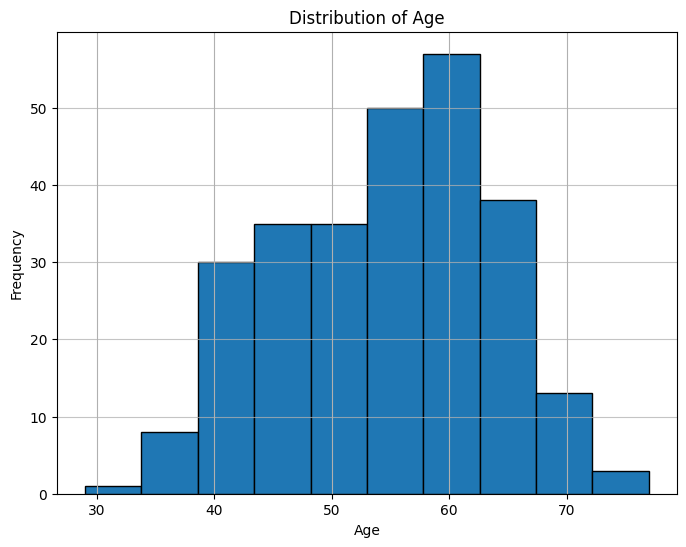

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
df['Age'].hist(bins=10, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

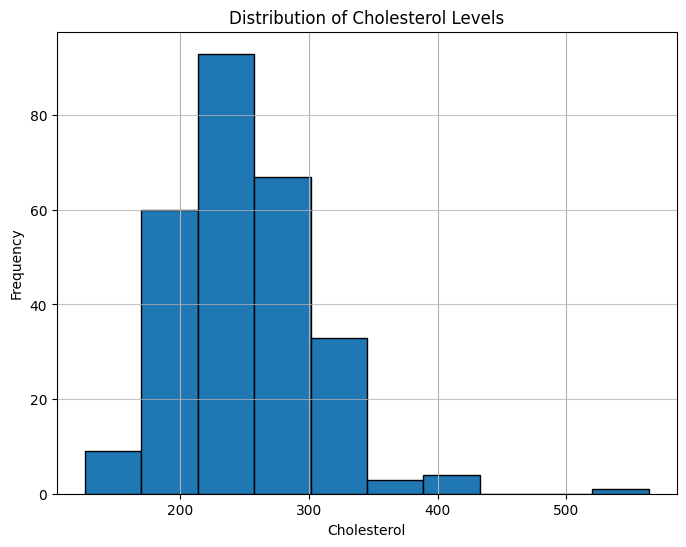

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
df['Cholesterol'].hist(bins=10, edgecolor='black')
plt.title('Distribution of Cholesterol Levels')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [19]:
numerical_df=df[numerical_features]
correlation_matrix=numerical_df.corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                               Age       Sex  Chest pain type        BP  \
Age                      1.000000 -0.094401         0.096920  0.273053   
Sex                     -0.094401  1.000000         0.034636 -0.062693   
Chest pain type          0.096920  0.034636         1.000000 -0.043196   
BP                       0.273053 -0.062693        -0.043196  1.000000   
Cholesterol              0.220056 -0.201647         0.090465  0.173019   
FBS over 120             0.123458  0.042140        -0.098537  0.155681   
EKG results              0.128171  0.039253         0.074325  0.116157   
Max HR                  -0.402215 -0.076101        -0.317682 -0.039136   
Exercise angina          0.098297  0.180022         0.353160  0.082793   
ST depression            0.194234  0.097412         0.167244  0.222800   
Slope of ST              0.159774  0.050545         0.136900  0.142472   
Number of vessels fluro  0.356081  0.086830         0.225890  0.085697   
Thallium         

In [22]:
correlation_threshold=0.7
highly_correlated_pairs=[]
# Iterate through the correlation matrix
# Using .abs() to consider both strong positive and strong negative correlations
# Using .unstack() to convert the matrix into a Series for easier filtering
# Filtering out self-correlations and duplicate pairs
for col1 in correlation_matrix.columns:
  for col2 in correlation_matrix.columns:
    if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > correlation_threshold:
    # Add only one instance of the pair (e.g., 'A'-'B' but not 'B'-'A')
      if (col2, col1, correlation_matrix.loc[col2, col1]) not in highly_correlated_pairs:
        highly_correlated_pairs.append((col1, col2, correlation_matrix.loc[col1, col2]))
if highly_correlated_pairs:
  print(f"Highly correlated variable pairs (absolute correlation > {correlation_threshold}):")
  for pair in highly_correlated_pairs:
    print(f"-{pair[0]} and {pair[1]}: {pair[2]:.4f}")
else:
  print(f"No highly correlated variable pairs found with an absolute correlation greater than {correlation_threshold}.")

No highly correlated variable pairs found with an absolute correlation greater than 0.7.


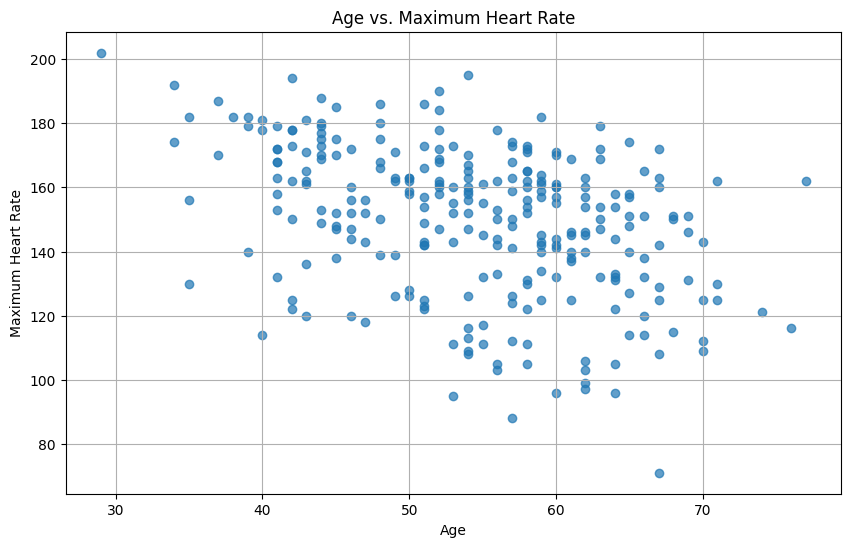

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Max HR'], alpha=0.7)
plt.title('Age vs. Maximum Heart Rate')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.grid(True)
plt.show()